# Week 5
## Plotting in Python: Matplotlib, Pandas, Seaborn.
  
  
Ayal Gussow, 03/01/2018

# Basic Outline
  
  
* Motivation: Why plot our data?
* How do we plot data?
* Plotting Styles
* In-Class / HW Assignment

# Why plot our data?



* Allows us to spot patterns we would otherwise miss

* Allows us to convey data to colaborators

* Gelman and Unwin 2011:
> A well-designed graph can display more information than a table of the same size, and more information than numbers embedded in text. Graphical displays allow and encourage direct visual comparisons.

# Let's see an example: Iris

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

* Dataset of 3 species of flowers (n=150), with various features (petal width, petal length, sepal width, sepal length)   


* https://www.kaggle.com/uciml/iris

![base](img/Petal-sepal.jpg)
* Photograph made in Hawai'i by Eric Guinther

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
iris = datasets.load_iris()

columns = ("sepal_length", "sepal_width", "petal_length", "petal_width", "species")

iris = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns=columns) 

# .c_ Translates slice objects to concatenation along the second axis.

iris["species_name"] = iris["species"].map({0.0: "Setosa", 1.0: "Versicolour", 2.0: "Virginica"})

print(iris) #.head())

     sepal_length  sepal_width  petal_length  petal_width  species  \
0             5.1          3.5           1.4          0.2      0.0   
1             4.9          3.0           1.4          0.2      0.0   
2             4.7          3.2           1.3          0.2      0.0   
3             4.6          3.1           1.5          0.2      0.0   
4             5.0          3.6           1.4          0.2      0.0   
5             5.4          3.9           1.7          0.4      0.0   
6             4.6          3.4           1.4          0.3      0.0   
7             5.0          3.4           1.5          0.2      0.0   
8             4.4          2.9           1.4          0.2      0.0   
9             4.9          3.1           1.5          0.1      0.0   
10            5.4          3.7           1.5          0.2      0.0   
11            4.8          3.4           1.6          0.2      0.0   
12            4.8          3.0           1.4          0.1      0.0   
13            4.3   

# Machine-Learning Assignment: Can we differentiate flowers by species?

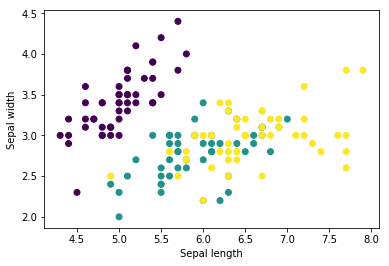

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the training points
plt.scatter(iris["sepal_length"], iris["sepal_width"], c=iris["species"])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# How do we plot in Python?


* Many packages
* Most popular is matplotlib

In [ ]:
# convention is to rename pyplot to plt
import matplotlib.pyplot as plt

# magic command to display matplotlib plots inline
%matplotlib inline

# Plot
plt.scatter(
    iris["sepal_length"], # X axis is the sepal length
    iris["sepal_width"],  # Y axis is the sepal width
    c=iris["species"]     # Color is the species
)

# create labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# show
plt.show()


In [ ]:
import matplotlib.pyplot as plt # convention is to rename pyplot to plt

# a "magic" command so that plots work in notebooks
%matplotlib inline

# PLT scatter plot (X, y, and color)
plt.scatter(iris["petal_length"], iris["petal_width"]) # Add color: c=iris["species"]

# name the labels, for clarity
plt.xlabel('Petal length')
plt.ylabel('Petal width')

# Let's get fancy

In [ ]:
# Let's set some limits on the axes
plt.scatter(
    iris["sepal_length"], iris["sepal_width"],
    c=iris["species"],
    # cmap=plt.cm.Set1, # Set2, etc # color sets
    # alpha=0.5, # transparency
    # s=10, #iris["petal_length"] * 20, # size of dots, depending on variable
    # marker="x", # type of dot picture
)

# name the labels, for clarity
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Remove ticks
#plt.xticks(())
#plt.yticks(())

plt.show()

# Histograms
* What are they?
* When would we want them?
* Doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

In [ ]:
plt.hist(iris["sepal_width"])
plt.xlabel('Sepal width')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.hist(iris["sepal_width"], color="red") # alpha=0.5, log=True, orientation="horizontal", bins=80, cumulative=True
#plt.hist(iris.loc[iris["species_name"] == "Setosa", "sepal_width"], color="blue", alpha=0.2)
#plt.hist(iris.loc[iris["species_name"] == "Versicolour", "sepal_width"], color="green", alpha=0.2)
#plt.hist(iris.loc[iris["species_name"] == "Virginica", "sepal_width"], color="yellow", alpha=0.2)
#plt.legend(["Setosa", "Versicolour"]) #, "Virginica"])
plt.show()

# Bar plots
* What are they?
* When would we want them?
* Doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

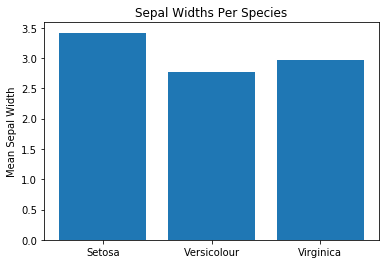

In [5]:
species = ("Setosa", "Versicolour", "Virginica")
y_pos = np.arange(len(species))
mean_widths = tuple(np.mean(iris.loc[iris["species_name"] == x, "sepal_width"]) for x in species)
 
plt.bar(y_pos, mean_widths)
plt.xticks(y_pos, species)
plt.ylabel('Mean Sepal Width')
plt.title('Sepal Widths Per Species')
 
plt.show()

In [ ]:
plt.bar(y_pos, mean_widths) #color="red", color=("red", "yellow", "green"), edgecolor=("blue", "green", "black")) # bottom=0, align='edge', width=(.1, .2, .3) , alpha=0.5)
# barh / yticks
plt.xticks(y_pos, species)
plt.ylabel('Mean Sepal Width')
plt.title('Sepal Widths Per Species')
 
plt.show()

# Box plots
* What are they?
* When would we want them?
* Doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

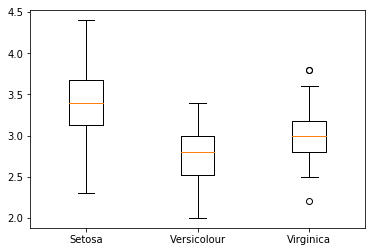

In [6]:
data_to_plot = list(iris.loc[iris["species_name"] == x, "sepal_width"] for x in species)
plt.boxplot(data_to_plot)
plt.xticks((1, 2, 3), species)
plt.show()

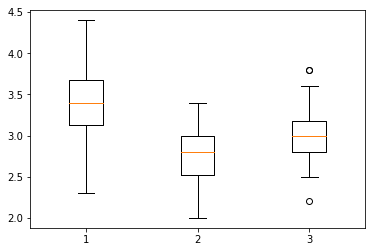

In [7]:
plt.boxplot(data_to_plot)#, notch=True, sym="x", vert=False, widths=.9, patch_artist=True, labels=species, showmeans=True)
# lie with medians, set outliers, etc
plt.show()

# Generic plot commands and subplots
* Doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html

### Figure
The canvas we are using.
### Subplot
Subsection of figure.
### Axes
Where we are plotting.

### plt.plot
Generic plot function that accepts x, y, and styling parameters.

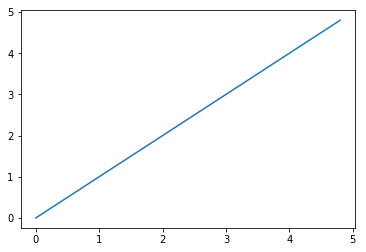

In [8]:
# evenly .2 intervals
t = np.arange(0., 5., 0.2)

# red dots
plt.plot(
    t, t,
)
plt.show()

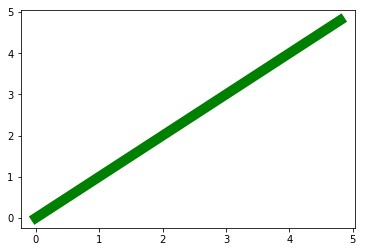

In [9]:
# evenly .2 intervals
t = np.arange(0., 5., 0.2)

# red dots
plt.plot(
    t, t, linewidth=10, color="green",
)
plt.show()

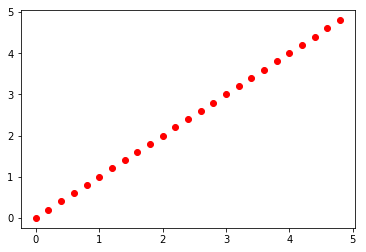

In [10]:
# evenly .2 intervals
t = np.arange(0., 5., 0.2)

# red dots
plt.plot(
    t, t, 'ro',
)
plt.show()

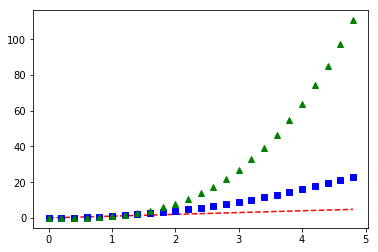

In [11]:
# red dashes, blue squares and green triangles
plt.plot(
    t, t, 'r--',
    t, t**2, 'bs',
    t, t**3, 'g^'
)
plt.show()

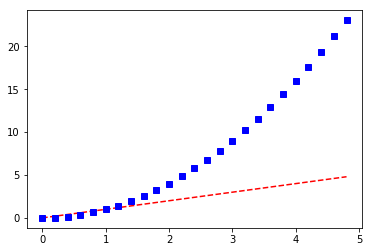

In [12]:
# red dashes, blue squares and green triangles
plt.plot(
    t, t, 'r--',
)

plt.plot(
    t, t**2, 'bs',
)

plt.show()

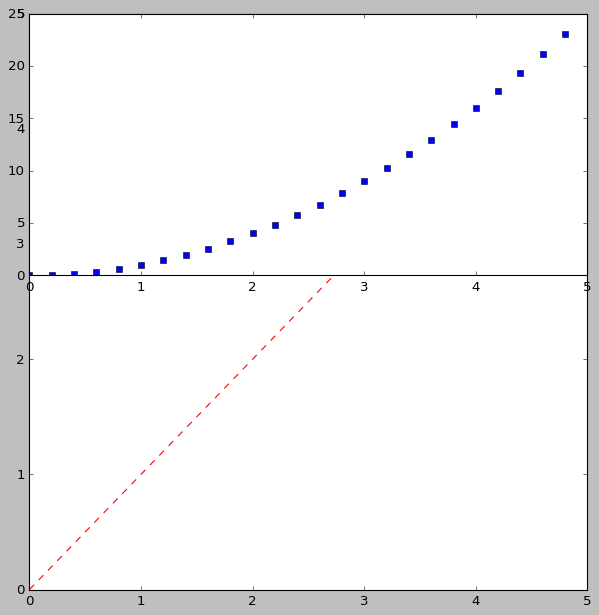

In [34]:
# subplots: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
fig = plt.figure(figsize=(9, 9)) # create canvas
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(2, 1, 1)

ax1.plot(
    t, t, 'r--',
)

ax2.plot(
    t, t**2, 'bs',
)

plt.show()

# Trend lines

In [35]:
z = np.polyfit(iris["petal_length"], iris["petal_width"], 1)
p = np.poly1d(z)
print(z)
print(p)

[ 0.41641913 -0.36651405]
 
0.4164 x - 0.3665


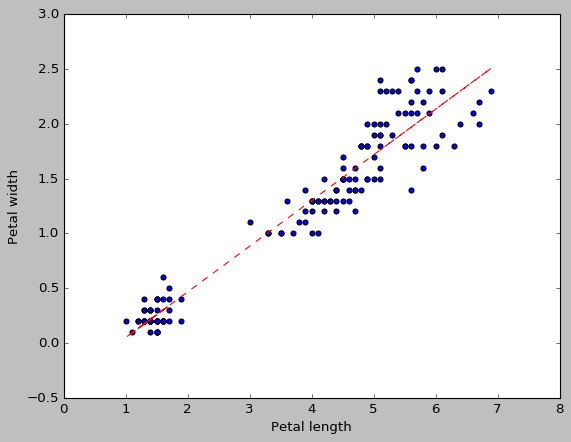

In [36]:
# PLT scatter plot (X, y, and color)
plt.scatter(iris["petal_length"], iris["petal_width"])
z = np.polyfit(iris["petal_length"], iris["petal_width"], 1)
p = np.poly1d(z)
plt.plot(iris["petal_length"], p(iris["petal_length"]),"r--")
# name the labels, for clarity
plt.xlabel('Petal length')
plt.ylabel('Petal width')

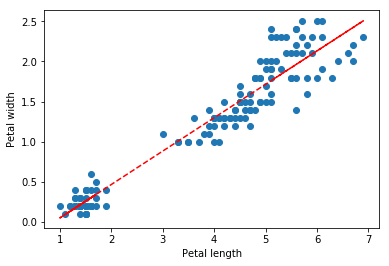

In [17]:
# PLT scatter plot (X, y, and color)
plt.scatter(iris["petal_length"], iris["petal_width"])
z = np.polyfit(iris["petal_length"], iris["petal_width"], 1)
p = np.poly1d(z)
plt.plot(iris["petal_length"], p(iris["petal_length"]),"r--")
# name the labels, for clarity
plt.xlabel('Petal length')
plt.ylabel('Petal width')
#plt.savefig("C:/Users/gusso/Desktop/x.png")

# Links
* https://matplotlib.org/index.html
* https://www.python-course.eu/matplotlib.php
* https://matplotlib.org/gallery.html

# Styles and other packages
* Matplotlib styles
* Pandas plotting based on matplotlib
* Seaborn
* Bokeh

['seaborn-bright', 'fivethirtyeight', '_classic_test', 'seaborn-deep', 'grayscale', 'seaborn-muted', 'seaborn-darkgrid', 'seaborn-dark', 'bmh', 'seaborn', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-paper', 'seaborn-whitegrid', 'seaborn-white', 'ggplot', 'dark_background', 'seaborn-colorblind', 'classic', 'seaborn-notebook']


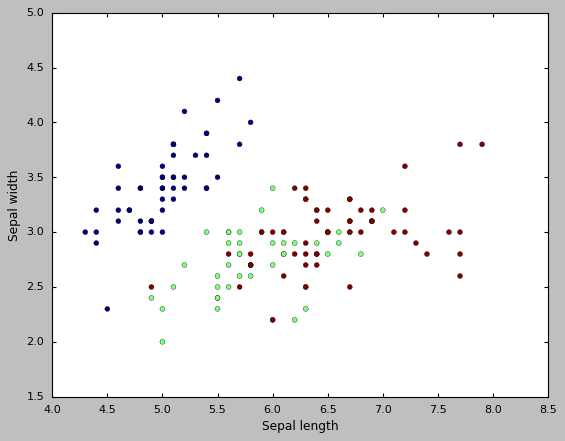

In [44]:
# Plot the training points
print(plt.style.available) # ooh cool styles
plt.figure()
plt.style.use(['seaborn-bright', 'fivethirtyeight', '_classic_test', 'seaborn-deep', 'grayscale', 'seaborn-muted', 'seaborn-darkgrid', 'seaborn-dark', 'bmh', 'seaborn', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-paper', 'seaborn-whitegrid', 'seaborn-white', 'ggplot', 'dark_background', 'seaborn-colorblind', 'classic', 'seaborn-notebook'])
plt.scatter(iris["sepal_length"], iris["sepal_width"], c=iris["species"])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# Pandas plotting based on matlab

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html


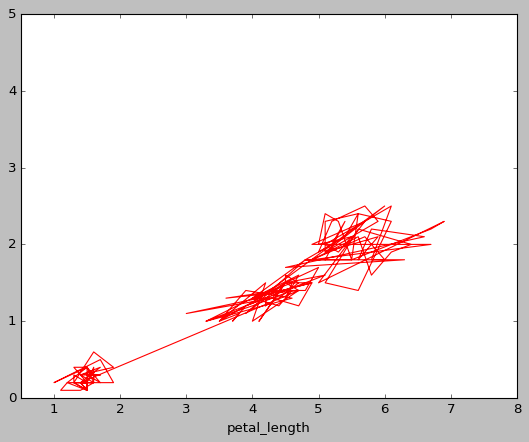

In [43]:
plt.style.use("seaborn-colorblind") 
plt.figure()
ax = iris.plot(x="petal_length", y="petal_width", style="r-", legend=False)
ax.set_xlim(0.5, 8.0)
ax.set_ylim(0, 5.0)
plt.show()

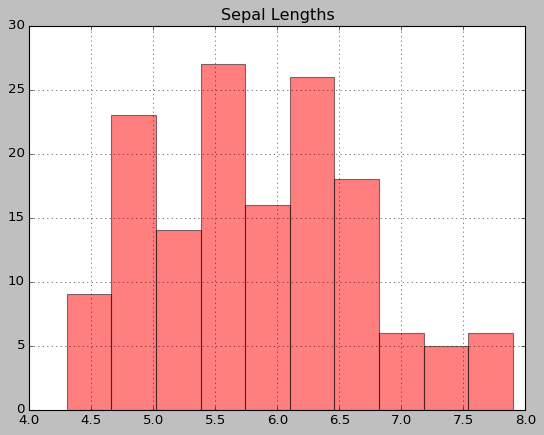

In [19]:
plt.style.use("classic")
plt.figure()
ax = iris.hist(column="sepal_length", color="red", alpha=0.5)
plt.title("Sepal Lengths")
plt.show()

# Seaborn
* https://seaborn.pydata.org/


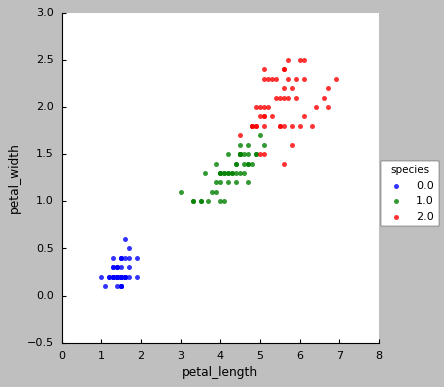

In [46]:
import seaborn as sns
sns.lmplot(x="petal_length", y="petal_width", data=iris, hue="species", fit_reg= False)
sns.set_style("whitegrid")

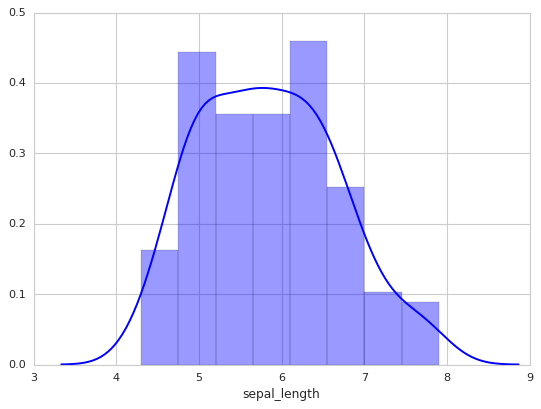

In [49]:
import seaborn as sns
sns.distplot(iris["sepal_length"])
sns.set_style("whitegrid")

# Bokeh
* https://bokeh.pydata.org/en/latest/docs/user_guide/quickstart.html

# Assignment Issues
* If you're still having trouble submitting, let us know on Slack.
* Class documentation:
```python
class Dog:
    """
    Class documentation.
    """
    def __init__(self):
        """
        Init documentation.
        """
        pass
```
* Remove "raise NotImplementedError()" statement
* Naming